# Descriptive analysis

This notebook is used primarily to calculate descriptive statistics for the dataset providing information on houses for sale in Denmark.

In [5]:
#Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats

In [7]:
#Importing dataset
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
csv_file_path = '../outputdata/df_final.csv'
df_final = pd.read_csv(csv_file_path)
df_final.set_index('Unnamed: 0', inplace=True)
df_final.index.name = None
print(len(df_final))

19851


In [9]:
df_final['price/m2'] = df_final['Price']/df_final['m2']

# DATA-PROCESSING

In [11]:
#EKSTREME OBSERVATIONER
print(len(df_final))

##Deleting observations with less than 20 m2 -> To avoid "non-appartments"
outliers_m2 = df_final[(df_final['m2'] < 20) | ((df_final['m2'] < 50) & (df_final['Boligtype'] == 'Landejendom'))]
print(outliers_m2)
df_final = df_final.drop(outliers_m2.index)


##Think about later: Maybe appartments more than 5 standard-deviations away from the mean are not interesting. After all, we are not into predicting prices for luxurus appartments. 
"""
# Calculate Z-scores for each value in the column
df_final['z_score_price_m2'] = stats.zscore(df_final['price/m2'])

# Define outliers as any points with a Z-score > 5 or < -5
outliers = df_final[(df_final['z_score_price_m2'] > 5) | (df_final['z_score_price_m2'] < -5)]
print(outliers.sort_values(by='price/m2', ascending=False))
"""







19851
                                Price          Schoolname  Distance to school  \
Risbankevej 40,7330         2495000.0        Artium Skole               5.600   
Smækbjergvej 18C,7480       1650000.0     Vildbjerg Skole               3.980   
Løvholmen 14, st. 10.,2720   250000.0  Damhusengens Skole               0.435   

                            School-grades  Trivsel      Boligtype  \
Risbankevej 40,7330                   NaN      NaN    Landejendom   
Smækbjergvej 18C,7480                 7.2      3.7    Landejendom   
Løvholmen 14, st. 10.,2720            7.5      3.7  Ejerlejlighed   

                           Energy-classification   Radon  Kommuneskat  \
Risbankevej 40,7330                         fejl     Lav         25.1   
Smækbjergvej 18C,7480                          F     Lav         24.9   
Løvholmen 14, st. 10.,2720                     E  Mellem         23.7   

                            Grundskyldspromillen  Liggetid    m2     Grund  \
Risbankevej 40,7330  

"\n# Calculate Z-scores for each value in the column\ndf_final['z_score_price_m2'] = stats.zscore(df_final['price/m2'])\n\n# Define outliers as any points with a Z-score > 5 or < -5\noutliers = df_final[(df_final['z_score_price_m2'] > 5) | (df_final['z_score_price_m2'] < -5)]\nprint(outliers.sort_values(by='price/m2', ascending=False))\n"

In [128]:
#Counting houses for sale in each Municipiality
"""print(df_final.groupby('Municipiality')['pris/m2'].count())"""

"print(df_final.groupby('Municipiality')['pris/m2'].count())"

# PLOTTING

C:\Users\matli\AppData\Local\Temp\ipykernel_16368\2718847104.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plotting['Price'], ax=ax[0], kde=True)
C:\Users\matli\AppData\Local\Temp\ipykernel_16368\2718847104.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plotting['m2'], ax=ax[1

18470.345345345348


Municipiality
Aabenraa Kommune            9343.878731
Aalborg Kommune            18864.035088
Aarhus Kommune             34226.190476
Albertslund Kommune        28726.415094
Allerød Kommune            32107.142857
                               ...     
Vejle Kommune              16731.843575
Vesthimmerlands Kommune     7071.005917
Viborg Kommune             12283.279656
Vordingborg Kommune        11168.224299
Ærø Kommune                 9854.651163
Name: price/m2, Length: 98, dtype: float64

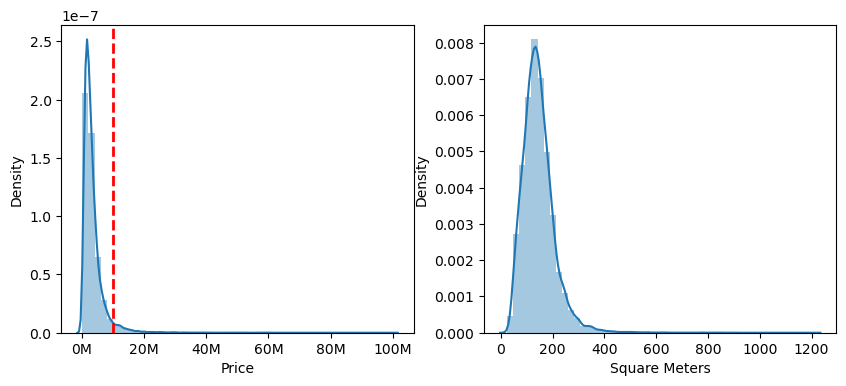

In [17]:
df_plotting = df_final
#Exploratory plotting
# Creating subplots without shared x-axis
#df_plotting['Price'] = df_plotting['Price'].clip(upper=15000000)
#df_plotting['m2'] = df_plotting['m2'].clip(upper=600)
#df_plotting['pris/m2'] = df_plotting['pris/m2'].clip(upper=100000)


# Define a formatter function to convert values to millions
def millions(x, pos):
    return f'{int(x / 1_000_000)}M'

# Apply the formatter to the axis
formatter = FuncFormatter(millions)


f, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the distributions
sns.distplot(df_plotting['Price'], ax=ax[0], kde=True)
sns.distplot(df_plotting['m2'], ax=ax[1])
ax[0].axvline(x=10e6, color='red', linestyle='--', linewidth=2)

# Formatting the x-axes (if needed)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlabel('Price')
ax[1].set_xlabel('Square Meters')

print(df_final['price/m2'].median())

df_median_price = df_final.groupby('Municipiality')['price/m2'].median()
df_median_price

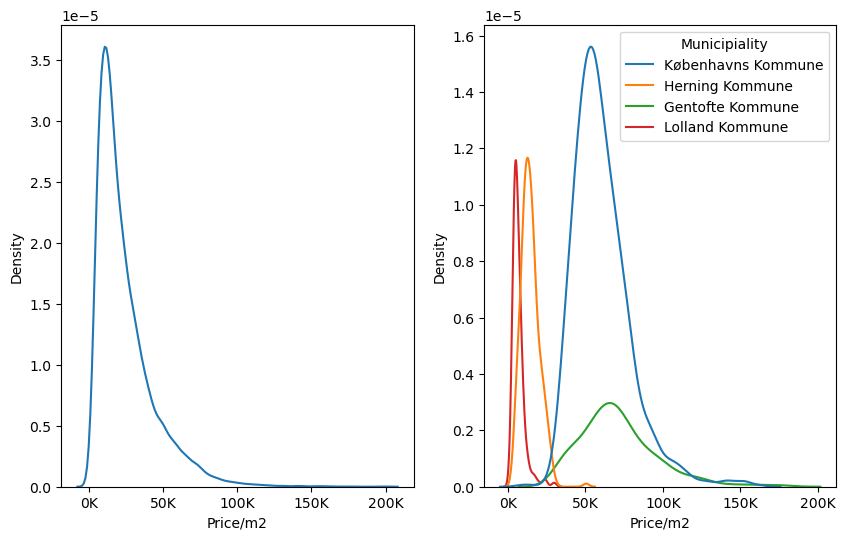

In [131]:
#Restriction: When plotting, we set the upper price/m2 limit to 200.000. Therefore we cant interpret 200.000 kr.- as the most expensive.
df_plotting['price/m2'] = df_plotting['price/m2'].clip(upper=200000)
####Ploting distribution price/m2.
# Function to format the x-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

filter = ['Københavns Kommune', 'Gentofte Kommune', 'Herning Kommune', 'Lolland Kommune']
df_filtered = df_plotting[df_plotting['Municipiality'].isin(filter)]

f,ax = plt.subplots(1,2, sharex=False, figsize=(10,6))

sns.kdeplot(data=df_filtered, x='price/m2', hue='Municipiality', fill=False, ax=ax[1])
sns.kdeplot(data=df_plotting, x='price/m2', fill=False, label='Country dist', ax=ax[0])

#Formatting:
ax[0].set_xlabel('Price/m2')
ax[1].set_xlabel('Price/m2')
ax[0].set_ylabel('Density')
ax[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax[1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))


#f.suptitle('Density Plot of Price/m2 for selected Municipialities')
plt.savefig('price_m2_municipialities.png', dpi=300, bbox_inches='tight')

# Distance to school and price
## Identifing patterns.
### Turns out that there might be a negative relationship between price and distance to school from 0 to 5 km.

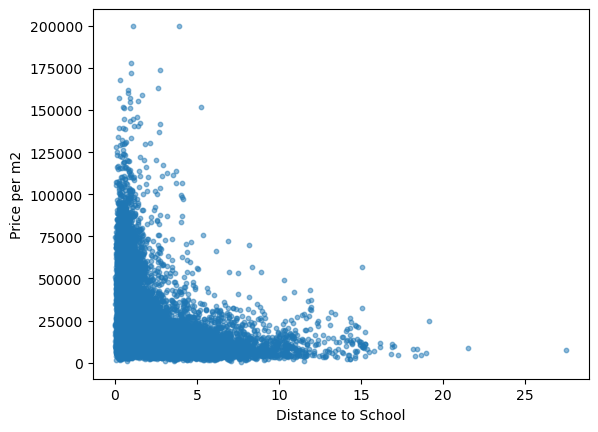

In [192]:
plt.scatter(df_final['Distance to school'], df_final['price/m2'], alpha=0.5, s=10)
#plt.title('Scatter Plot of Distance to School vs Price per m2')
plt.xlabel('Distance to School')
plt.ylabel('Price per m2')
plt.show()

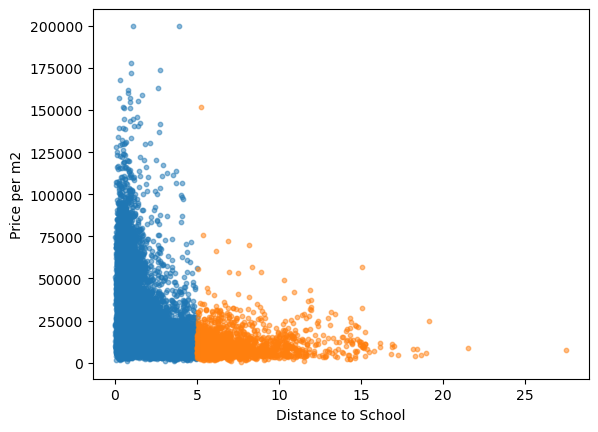

In [230]:
df_segment_1 = df_final[df_final['Distance to school'] < 5]
df_segment_2 = df_final[df_final['Distance to school'] >= 5]

plt.scatter(df_segment_1['Distance to school'], df_segment_1['price/m2'], alpha=0.5, s=10)
plt.scatter(df_segment_2['Distance to school'], df_segment_2['price/m2'], alpha=0.5, s=10)
#plt.title('Scatter Plot of Distance to School vs Price per m2')
plt.xlabel('Distance to School')
plt.ylabel('Price per m2')
plt.show()

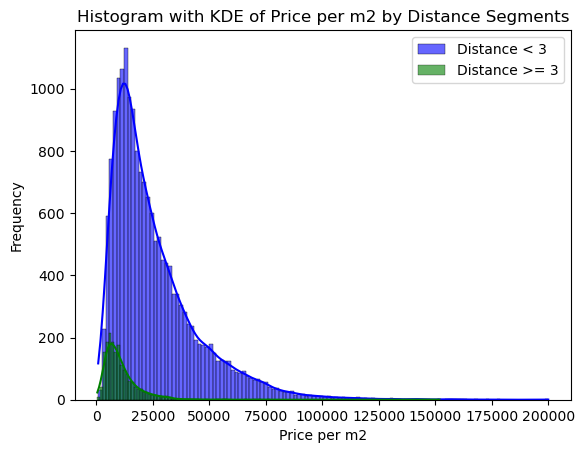

In [232]:
sns.histplot(data=df_segment_1['price/m2'], color='blue', kde=True, label='Distance < 3', alpha=0.6)
sns.histplot(data=df_segment_2['price/m2'], color='green', kde=True, label='Distance >= 3', alpha=0.6)
plt.legend()
plt.title('Histogram with KDE of Price per m2 by Distance Segments')
plt.xlabel('Price per m2')
plt.ylabel('Frequency')
plt.show()


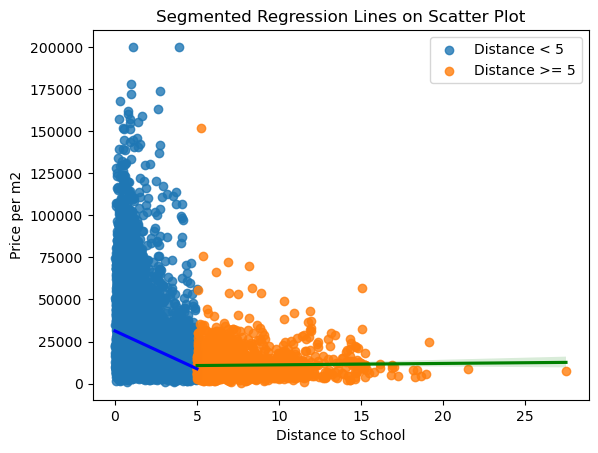

In [234]:
sns.regplot(data=df_segment_1, x='Distance to school', y='price/m2', scatter=True, 
            line_kws={"color": "blue"}, label='Distance < 5')
sns.regplot(data=df_segment_2, x='Distance to school', y='price/m2', scatter=True, 
            line_kws={"color": "green"}, label='Distance >= 5')
plt.legend()
plt.title('Segmented Regression Lines on Scatter Plot')
plt.xlabel('Distance to School')
plt.ylabel('Price per m2')
plt.show()


In [274]:
#print(df_final['Distance to school'].isna().sum())
df_final['Distance_rouned'] = df_final['Distance to school'].round()

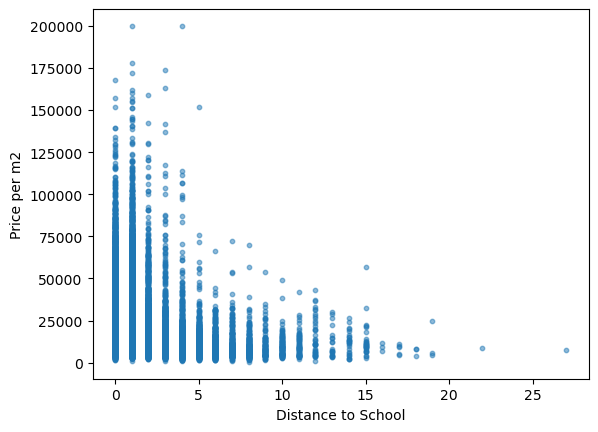

In [276]:
plt.scatter(df_final['Distance_rouned'], df_final['price/m2'], alpha=0.5, s=10)
#plt.title('Scatter Plot of Distance to School vs Price per m2')
plt.xlabel('Distance to School')
plt.ylabel('Price per m2')
plt.show()